In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
first = pd.read_csv("2015.csv", low_memory=False)
second = pd.read_csv("2016.csv", low_memory=False)
third = pd.read_csv("2017.csv", low_memory=False)
fourth = pd.read_csv("2018.csv", low_memory=False)
fifth = pd.read_csv("2019.csv", low_memory=False)

dataframe = pd.concat([first, second, third, fourth, fifth], axis = 0)

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [4]:
first.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                             101
Location_Northing_OSGR                            101
Longitude                                         101
Latitude                                          101
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               67
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [5]:
dataframe.nunique()


Accident_Index                                  927387
Location_Easting_OSGR                           182519
Location_Northing_OSGR                          221877
Longitude                                      1059046
Latitude                                       1001148
Police_Force                                        51
Accident_Severity                                    3
Number_of_Vehicles                                  27
Number_of_Casualties                                47
Date                                              3286
Day_of_Week                                          7
Time                                              1439
Local_Authority_(District)                         416
Local_Authority_(Highway)                          207
1st_Road_Class                                       6
1st_Road_Number                                   6854
Road_Type                                            6
Speed_limit                                          8
Junction_D

In [6]:
dataframe["Junction_Control"].unique()


array([nan, 'Automatic traffic signal', 'Giveway or uncontrolled',
       'Stop Sign', 'Authorised person'], dtype=object)

## Preprocessing and Cleaning Data

In [7]:
dataframe["Junction_Detail"]


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
464692   NaN
464693   NaN
464694   NaN
464695   NaN
464696   NaN
Name: Junction_Detail, Length: 1504150, dtype: float64

In [8]:
dataframe.drop(["Junction_Detail"], axis=1, inplace=True)

In [9]:
dataframe.dropna(axis=0, how="any", inplace=True)

In [10]:
dataframe


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002900,2005
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,...,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005
10,200501BS00012,526240.0,178900.0,-0.182872,51.494902,1,3,1,1,16/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002835,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455895,201463DP39314,322520.0,307540.0,-3.146994,52.659999,63,2,1,2,05/12/2014,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,W01000501,2014
455896,201463DP39414,282430.0,212670.0,-3.706470,51.800237,63,3,2,1,20/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,2,Yes,W01000496,2014
455897,201463DP39514,276800.0,210180.0,-3.787192,51.776647,63,2,2,1,27/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,W01001899,2014
455898,201463DP39614,306110.0,262480.0,-3.376854,52.252424,63,3,2,1,11/11/2014,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,2,No,W01000455,2014


In [11]:
dataframe[["day", "month", "year"]] = dataframe["Date"].str.split("/", expand = True)
dataframe[["day", "month", "year"]]

,day,month,year
1,05,01,2005
6,13,01,2005
8,15,01,2005
9,15,01,2005
10,16,01,2005
...,...,...,...
455895,05,12,2014
455896,20,12,2014
455897,27,12,2014
455898,11,11,2014


In [12]:
dataframe["Time"]

1         17:36
6         20:40
8         22:43
9         16:00
10        00:42
          ...  
455895    11:45
455896    06:37
455897    01:55
455898    12:25
455906    18:40
Name: Time, Length: 845643, dtype: object

In [13]:
dataframe[["Hour", "Minute"]] = dataframe["Time"].str.split(":", expand=True)
dataframe[["Hour", "Minute"]]

,Hour,Minute
1,17,36
6,20,40
8,22,43
9,16,00
10,00,42
...,...,...
455895,11,45
455896,06,37
455897,01,55
455898,12,25


In [14]:
dataframe["Day_of_Week"].replace({1:"Sunday", 2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 7:"Saturday"}, inplace=True)
dataframe["Day_of_Week"]

1         Wednesday
6          Thursday
8          Saturday
9          Saturday
10           Sunday
            ...    
455895       Friday
455896     Saturday
455897     Saturday
455898      Tuesday
455906       Sunday
Name: Day_of_Week, Length: 845643, dtype: object

## Explore Data

<AxesSubplot:>

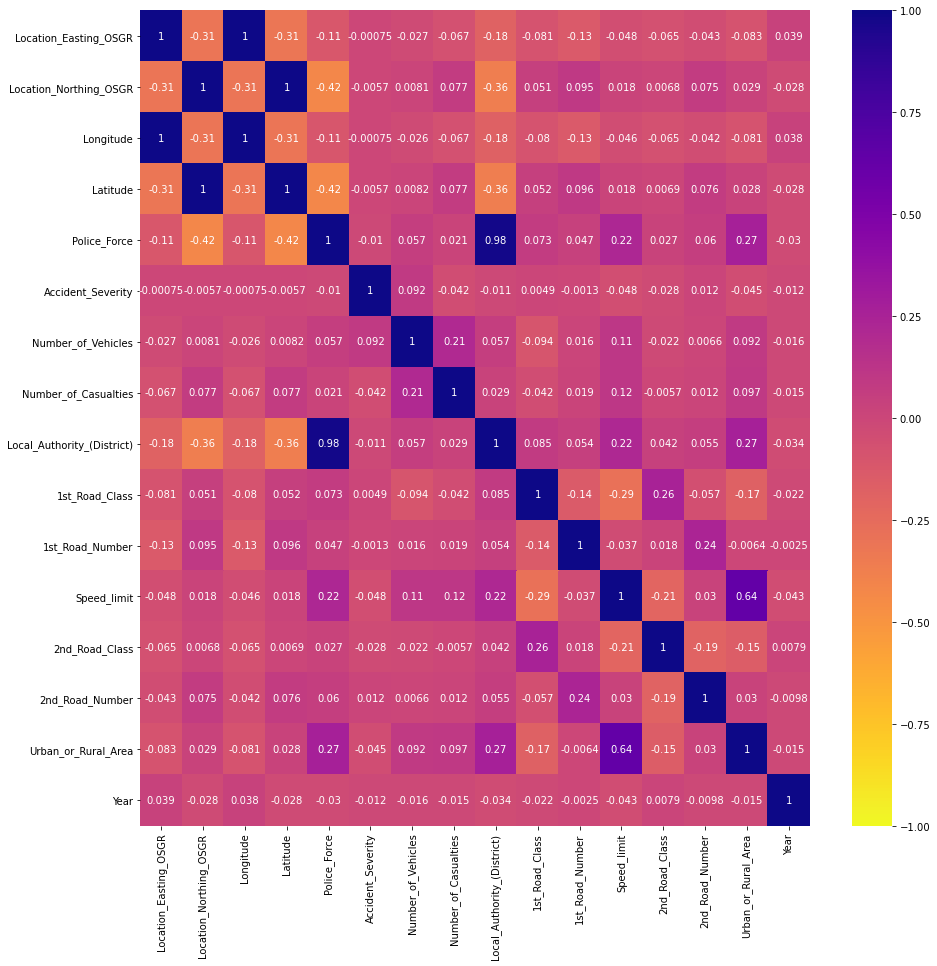

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(dataframe.corr(), vmin=-1, cmap="plasma_r", annot=True)



<AxesSubplot:>

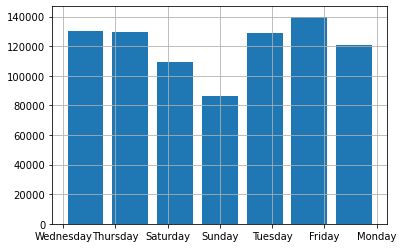

In [16]:
dataframe["Day_of_Week"].hist(bins=7, rwidth=0.8)

<AxesSubplot:>

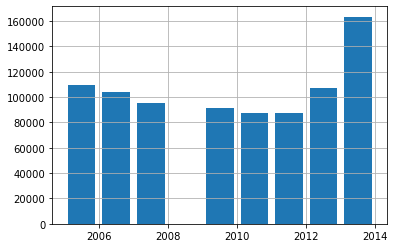

In [17]:
dataframe["Year"].hist(bins=9, rwidth=0.8)

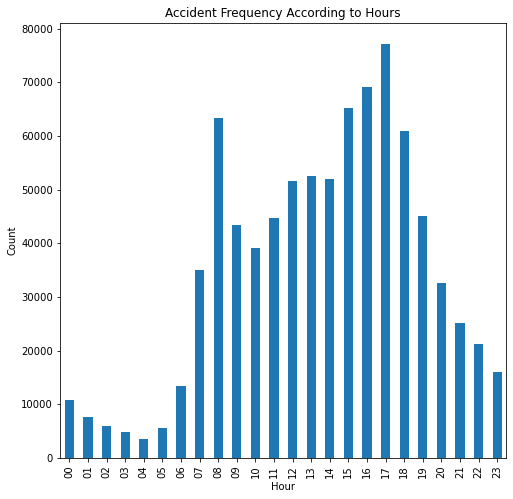

In [18]:
plt.figure(figsize=(8,8))
dataframe.groupby(["Hour"]).size().plot(kind="bar")

plt.title("Accident Frequency According to Hours")
plt.xlabel("Hour")
plt.ylabel("Count")

plt.show()

Text(0, 0.5, 'Count')

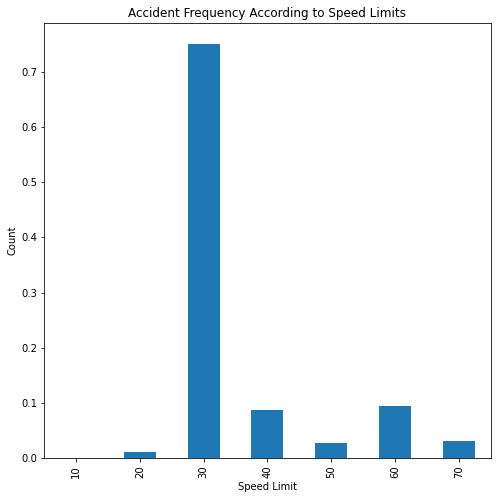

In [19]:
speed_limit = dataframe.groupby(["Speed_limit"]).size()
normalized_speed_limit = speed_limit / speed_limit.sum()
normalized_speed_limit


plt.figure(figsize=(8,8))
normalized_speed_limit.plot(kind="bar")

plt.title("Accident Frequency According to Speed Limits")
plt.xlabel("Speed Limit")
plt.ylabel("Count")

In [20]:
road_type = dataframe.groupby(["Road_Type","Accident_Severity"])["Accident_Severity"]



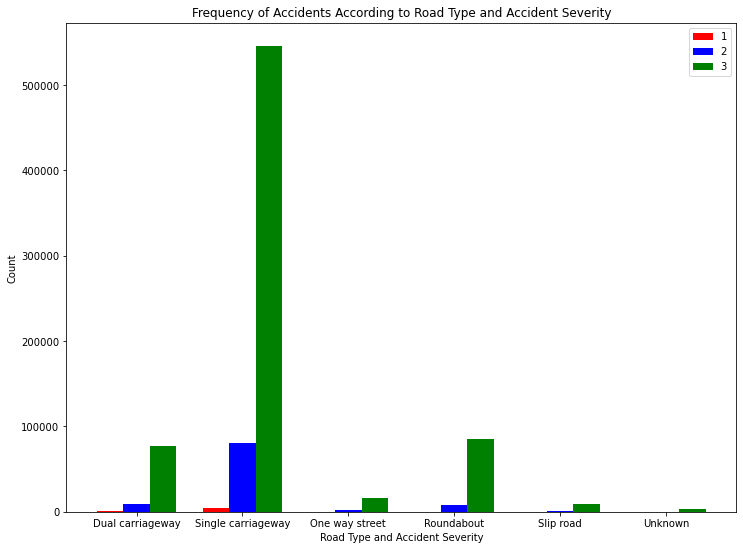

In [21]:
severity1 = []
severity2 = []
severity3 = []
key_list = dataframe["Road_Type"].unique().tolist()

for key in key_list:
    severity1.append(road_type.get_group((key, 1)).count())
    severity2.append(road_type.get_group((key, 2)).count())
    severity3.append(road_type.get_group((key, 3)).count())
    
plt.figure(figsize=(12,9))
    
bar1 = plt.bar(np.arange(6), severity1, 0.25, color="red", label="1")
bar1 = plt.bar(np.arange(6)+0.25, severity2, 0.25, color="blue", label="2")
bar1 = plt.bar(np.arange(6)+0.5, severity3, 0.25, color="green", label="3")

plt.xticks(np.arange(6)+0.25, key_list)
plt.title("Frequency of Accidents According to Road Type and Accident Severity")
plt.xlabel("Road Type and Accident Severity")
plt.ylabel("Count")

plt.legend()
plt.show()


In [22]:
road_type.count()

Road_Type           Accident_Severity
Dual carriageway    1                       974
                    2                      9627
                    3                     77542
One way street      1                       119
                    2                      2264
                    3                     15867
Roundabout          1                       284
                    2                      8203
                    3                     85508
Single carriageway  1                      5009
                    2                     80383
                    3                    545726
Slip road           1                        69
                    2                       786
                    3                      9680
Unknown             1                        16
                    2                       301
                    3                      3285
Name: Accident_Severity, dtype: int64

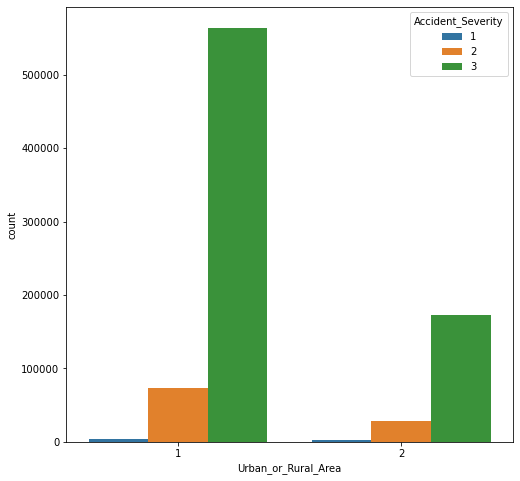

In [68]:
plt.figure(figsize=(8,8))
sns.countplot(data=dataframe, x="Urban_or_Rural_Area", hue="Accident_Severity")

plt.show()

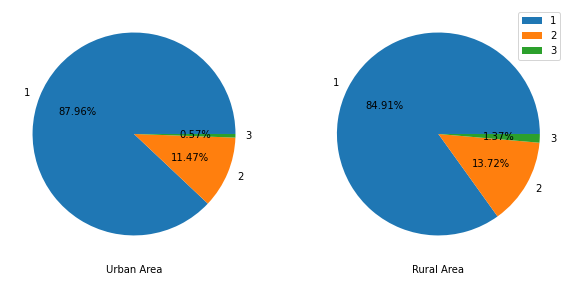

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))


ax1.pie(urban_with_severity.value_counts(), labels=[1,2,3], autopct='%.2f%%')
ax1.set_xlabel("Urban Area")

ax2.pie(rural_with_severity.value_counts(), labels=[1,2,3], autopct='%.2f%%')
ax2.set_xlabel("Rural Area")

plt.legend()
plt.show()
